In [31]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(7, include_bias = False)
poly.fit_transform(x[:, np.newaxis])

array([[1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01, 6.4000e+01, 1.2800e+02],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02, 7.2900e+02, 2.1870e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03, 4.0960e+03, 1.6384e+04]])

In [41]:
# Polynomial basis functions

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(7, include_bias = True), LinearRegression())

In [44]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)

xfit = np.arange(0, 10, 0.01)
yfit = poly_model.predict(xfit[:, np.newaxis])

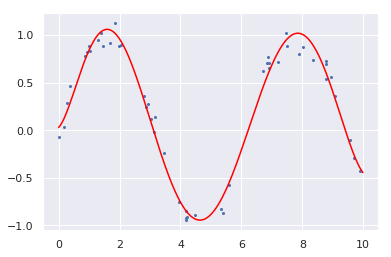

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y, s = 4)
ax.plot(xfit, yfit, c = 'red')

In [47]:
# Gaussian basis functions
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis = None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, axis = None):
        # N centers along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis = 1)

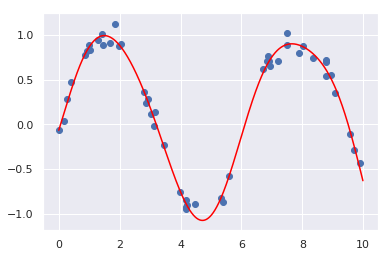

In [62]:
gauss_model = make_pipeline(GaussianFeatures(10), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.plot(xfit, yfit, c = 'red')

In [64]:
def basis_plot(model, title = None):
    fig, ax = plt.subplots(2, sharex = True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim = (-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel = 'basis location', ylabel = 'coefficient', xlim = (0, 10))

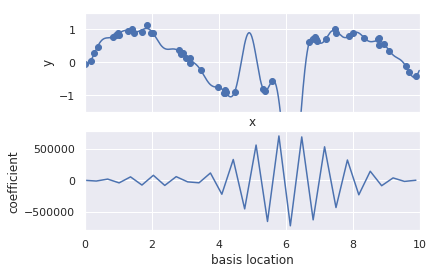

In [65]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

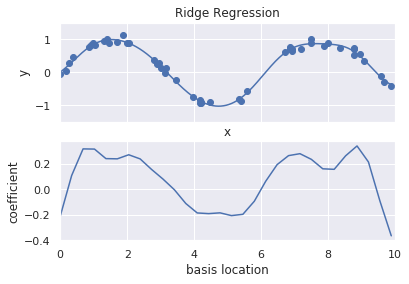

In [66]:
# Regularization
# L2 (Ridge, Tikhonov regularization)
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha = 0.1))
basis_plot(model, title = 'Ridge Regression')

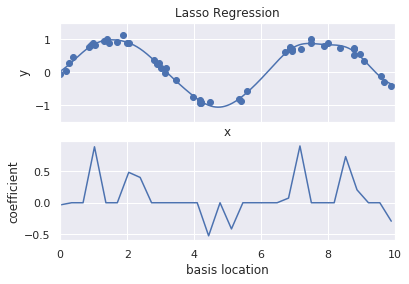

In [69]:
# L1 (Lasso regularization)
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha = 0.001, max_iter = 10000))
basis_plot(model, title = 'Lasso Regression')